In [1]:
# importing required libraries
import numpy as np 
import pandas as pd
import csv
from PIL import Image
import string

In [2]:
# storing the location of the csv file
File_Path ='A_Z Handwritten Data/A_Z Handwritten Data.csv'

In [3]:
#reading the data using pandas
data = pd.read_csv('A_Z Handwritten Data/A_Z Handwritten Data.csv')

In [4]:
# separating the independent and dependent variable 
X = data.drop('0',axis = 1)
y = data['0']

In [5]:
#splitting the data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [6]:
print(X_train.shape)
print(X_test.shape)

(260715, 784)
(111735, 784)


In [7]:
# creating a dataframe of training images and labels
train_images_csv = pd.concat([y_train, X_train], axis =1)
# sorting the dataframe lexicographically
train_images_csv = train_images_csv.sort_values('0')

# similarly a dataframe of testing images and labels and sorting.
test_images_csv = pd.concat([y_test, X_test], axis =1)
test_images_csv = test_images_csv.sort_values('0')

# storing the training and testing data frame as csv
export_csv_training = train_images_csv.to_csv ('data/training.csv', index = None)
export_csv_test = test_images_csv.to_csv ('data/test.csv', index = None)

In [8]:
# This section reads the above created csv and converts and stores them as images in different folders 
image_Folder_Path = 'data/image'
image_Folder_Path_training = "data/image/training-set"
image_Folder_Path_test = "data/image/test-set"

Alphabet_Mapping_List = list(string.ascii_uppercase)

import os

# creates folders with alphabets name where training images will be stored
for alphabet in Alphabet_Mapping_List:
    path = image_Folder_Path_training + '/' + alphabet
    if not os.path.exists(path):
        os.makedirs(path)
        
# creates folders with alphabets name where testing images will be stored
for alphabet in Alphabet_Mapping_List:
    path = image_Folder_Path_test + '/' + alphabet
    if not os.path.exists(path):
        os.makedirs(path)
        
# The below code converts csv to images.

training_csv = 'data/training.csv'
test_csv ='data/test.csv'


In [9]:
#The below code should be executed once for creating the training image and once for testing image
def convert_csv_to_image (filePath,image_Folder_Path):
    count = 1
    last_digit_Name =  None
    with open(filePath,newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='|')
        count = 0
        for row in reader:
            digit_Name = row[0]
            image_array = np.asarray(row[1:])
            image_array = image_array.reshape(28, 28)
            new_image = Image.fromarray(image_array.astype('float'))
            new_image = new_image.convert("L")

            if last_digit_Name != str(Alphabet_Mapping_List[(int)(digit_Name)]):
                last_digit_Name = str(Alphabet_Mapping_List[(int)(digit_Name)])
                count = 0
                print ("")
                print ("Prcessing Alphabet - " + str (last_digit_Name))

            image_Path = image_Folder_Path + '/' + last_digit_Name + '/' + str(last_digit_Name) + '-' + str(count) + '.png'
            new_image.save(image_Path)
            count = count + 1

            if count % 1000 == 0:
                print ("Images processed: " + str(count))

In [10]:
convert_csv_to_image(training_csv,image_Folder_Path_training )


Prcessing Alphabet - A
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000
Images processed: 5000
Images processed: 6000
Images processed: 7000
Images processed: 8000
Images processed: 9000

Prcessing Alphabet - B
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000
Images processed: 5000
Images processed: 6000

Prcessing Alphabet - C
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000
Images processed: 5000
Images processed: 6000
Images processed: 7000
Images processed: 8000
Images processed: 9000
Images processed: 10000
Images processed: 11000
Images processed: 12000
Images processed: 13000
Images processed: 14000
Images processed: 15000
Images processed: 16000

Prcessing Alphabet - D
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000
Images processed: 5000
Images processed: 6000
Images processed: 7000

Prcessing Alphabet - E

In [11]:
convert_csv_to_image(test_csv, image_Folder_Path_test)


Prcessing Alphabet - A
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000

Prcessing Alphabet - B
Images processed: 1000
Images processed: 2000

Prcessing Alphabet - C
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000
Images processed: 5000
Images processed: 6000
Images processed: 7000

Prcessing Alphabet - D
Images processed: 1000
Images processed: 2000
Images processed: 3000

Prcessing Alphabet - E
Images processed: 1000
Images processed: 2000
Images processed: 3000

Prcessing Alphabet - F

Prcessing Alphabet - G
Images processed: 1000

Prcessing Alphabet - H
Images processed: 1000
Images processed: 2000

Prcessing Alphabet - I

Prcessing Alphabet - J
Images processed: 1000
Images processed: 2000

Prcessing Alphabet - K
Images processed: 1000

Prcessing Alphabet - L
Images processed: 1000
Images processed: 2000
Images processed: 3000

Prcessing Alphabet - M
Images processed: 1000
Images processed: 200

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

#creating a 2-layer CNN

classifier = Sequential()

classifier.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Dropout(0.2))

classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Dropout(0.2))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 26, activation='softmax'))

classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# In this section using ImageDataGenerator we will create real time data augmentation
from keras.preprocessing.image import ImageDataGenerator

#augmenting training data 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

#reading the images from training folder
training_set = train_datagen.flow_from_directory('data/image/training-set',
                                                 target_size = (28, 28),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',color_mode ="grayscale")

Found 261395 images belonging to 26 classes.


In [9]:
# reading the images from testing folder
test_set = test_datagen.flow_from_directory('data/image/test-set',
                                                 target_size = (28, 28),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',color_mode ="grayscale")

Found 112415 images belonging to 26 classes.


In [10]:
# # creating different callback options
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# mcp = ModelCheckpoint(filepath='cnn_model.h5',monitor='val_loss',verbose=1,save_best_only=True)
# es = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=10, verbose=1)
# rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

In [11]:
#fitting the model
classifier.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = len(test_set))

Epoch 1/5
8169/8169 [==============================] - 582s 71ms/step - loss: 0.2579 - accuracy: 0.9235 - val_loss: 0.1838 - val_accuracy: 0.9516

Epoch 00001: val_loss improved from inf to 0.18384, saving model to cnn_model.h5
Epoch 2/5
8169/8169 [==============================] - 296s 36ms/step - loss: 0.1289 - accuracy: 0.9620 - val_loss: 0.0159 - val_accuracy: 0.9749

Epoch 00002: val_loss improved from 0.18384 to 0.01594, saving model to cnn_model.h5
Epoch 3/5
8169/8169 [==============================] - 300s 37ms/step - loss: 0.1075 - accuracy: 0.9681 - val_loss: 0.0372 - val_accuracy: 0.9751

Epoch 00003: val_loss did not improve from 0.01594
Epoch 4/5
8169/8169 [==============================] - 292s 36ms/step - loss: 0.0977 - accuracy: 0.9711 - val_loss: 0.0771 - val_accuracy: 0.9775

Epoch 00004: val_loss did not improve from 0.01594
Epoch 5/5
8169/8169 [==============================] - 291s 36ms/step - loss: 0.0909 - accuracy: 0.9733 - val_loss: 0.0017 - val_accuracy: 0.979

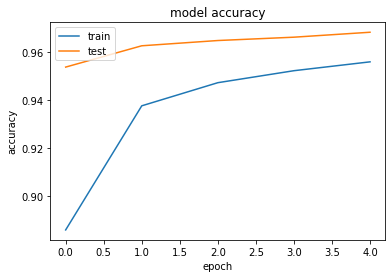

In [25]:
import matplotlib.pyplot as plt
plt.plot(classifier.history.history['accuracy'])
plt.plot(classifier.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

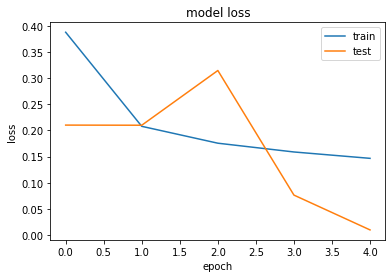

In [26]:
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [12]:
# # evaluate the model
# scores = classifier.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))
# save model and architecture to single file
classifier.save("model1.h5")
print("Saved model to disk")

Saved model to disk
